In [58]:
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Визуализация датасета MNIST

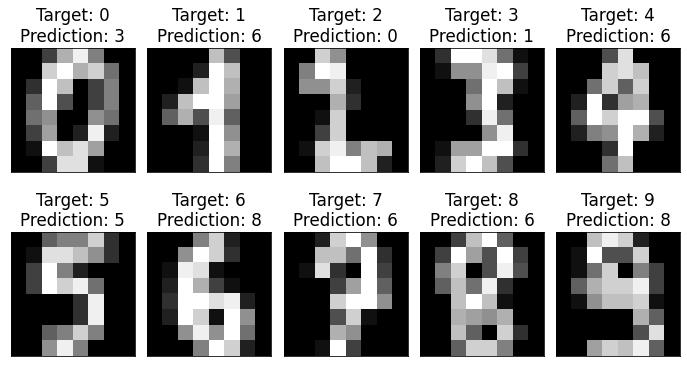

In [91]:
df = load_digits(as_frame=True).data
df['Target'] = load_digits(as_frame=True).target

image_size = [int((df.shape[1] - 1) ** 0.5)] * 2

targets_unique = df.Target.unique()
targets_unique.sort()
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
plt.rcParams.update({'font.size': 14})
for i in targets_unique:
    row = i // 5
    col = i - 5 * (i // 5)
    indices = np.arange(len(df))
    np.random.shuffle(indices)
    for j in indices:
        if df.Target[j] == i:
            break
    image = df.iloc[j, :-1].to_numpy().reshape(*image_size)
    ax[row, col].imshow(image)
    ax[row, col].set_xticks([])
    ax[row, col].set_yticks([])
    ax[row, col].set_title(f'Target: {df.Target[j]}\nPrediction: {np.random.randint(9)}')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.3)
plt.show()

# Визуализация классификации по признакам

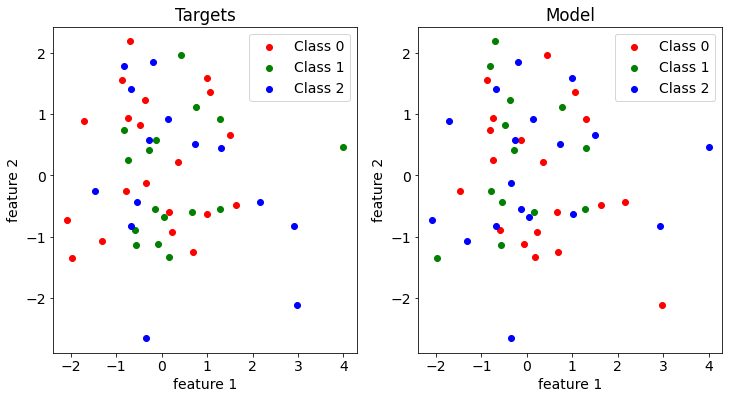

In [50]:
from matplotlib import pyplot as plt

x = np.random.randn(50)
y = np.random.randn(50)

targets = np.random.randint(3, size=(50))
predictions = np.random.randint(3, size=(50))

feature1 = 1
feature2 = 2
colors = ['r', 'g', 'b']

fig, ax = plt.subplots(figsize=(12, 6), ncols=2, nrows=1)

for i in range(3) :
    x_target = x[targets == i]
    y_target = y[targets == i]
    ax[0].scatter(x_target, y_target, c=colors[i])
    
    x_cluster = x[predictions == i]
    y_cluster = y[predictions == i]
    ax[1].scatter(x_cluster, y_cluster, c=colors[i])

ax[0].set_title(f'Targets')
ax[0].set_xlabel(f'feature {feature1}')
ax[0].set_ylabel(f'feature {feature2}')
ax[0].legend([f'Class {i}' for i in range(3)])

ax[1].set_title(f'Model')
ax[1].set_xlabel(f'feature {feature1}')
ax[1].set_ylabel(f'feature {feature2}')
ax[1].legend([f'Class {i}' for i in range(3)])

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.show()

# Визуализация регрессии

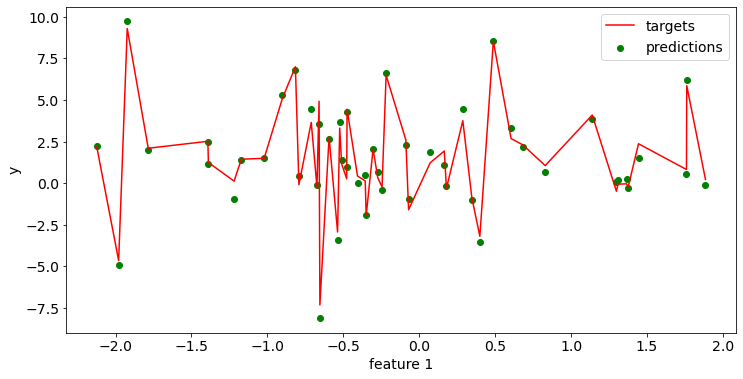

In [77]:
model = SGDRegressor()

x = np.random.randn(50, 5)
y = (x * np.array([0.1, -1, 0.26, 3, 0.75])).sum(axis=1) + 0.65 + np.random.randn(50) * 0.5

model.fit(x, y)

x_pred = x[x[:, 0].argsort()]
y_pred = model.predict(x_pred)
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(x[:, 0], y, c='g')
ax.plot(x_pred[:, 0], y_pred, c='r')
ax.legend(['targets', 'predictions'])
ax.set_xlabel('feature 1')
ax.set_ylabel('y')
plt.show()

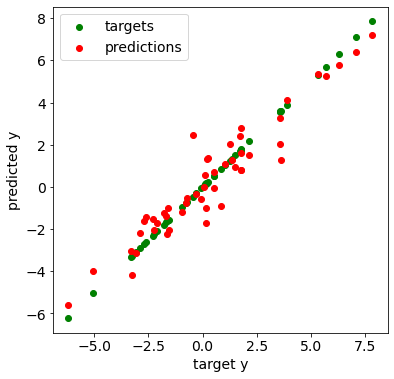

In [80]:
model = SGDRegressor()

x = np.random.randn(50, 5)
y = (x * np.array([0.1, -1, 0.26, 3, 0.75])).sum(axis=1) + 0.65 + np.random.randn(50)

model.fit(x, y)

y_pred = model.predict(x)
fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(y, y, c='g')
ax.scatter(y, y_pred, c='r')
ax.legend(['targets', 'predictions'])
ax.set_xlabel('target y')
ax.set_ylabel('predicted y')
plt.show()

# Матрица ошибок

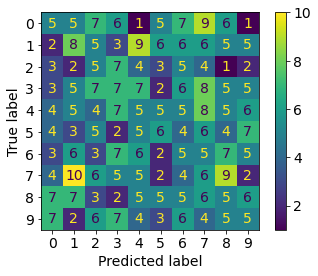

In [109]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y = np.random.randint(10, size=(500))
# y_pred = y.copy()
y_pred = np.random.randint(10, size=(500))

cm = confusion_matrix(y, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

# Визуализация метрики

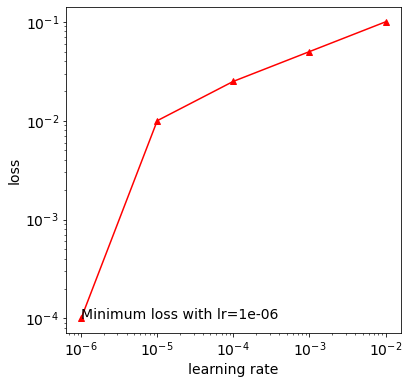

In [87]:
losses = np.array([0.1, 0.05, 0.025, 0.01, 0.0001])
lr = np.array([1e-2, 1e-3, 1e-4, 1e-5, 1e-6])

fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(lr, losses, c='r', marker='^')
ax.set_xlabel('learning rate')
ax.set_ylabel('loss')
ax.text(lr[losses.argmin()], losses.min(), f'Minimum loss with lr={lr[losses.argmin()]}')
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

# Практическое задание *

Сделать визуализацию метрики в своей работе